In [1]:
from json import loads
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np


In [2]:
POSTS_PATH = "../../2.NerSaLang/Post_Analysis.json"
POST_PATH = "../SaNerGoodClusters.json"

In [3]:
df = pd.read_csv('GoodClusters.csv')  # Replace 'your_data.csv' with your actual file path

# Separate data by class label
cl0_ids = df[df['Cluster Label'] == -1][['Image ID']].values.tolist()
cl1_ids = df[df['Cluster Label'] == 0][['Image ID']].values.tolist()
cl2_ids = df[df['Cluster Label'] == 1][['Image ID']].values.tolist()
cl0_ids = [item for sublist in cl0_ids for item in sublist]
cl1_ids = [item for sublist in cl1_ids for item in sublist]
cl2_ids = [item for sublist in cl2_ids for item in sublist]
cl0 = []
cl1 = []
cl2 = []
with open(POSTS_PATH, 'r') as input_file:
    for line in input_file:
        post = json.loads(line)
        if post["_id"] in cl0_ids:
            cl0.append(post)
        elif post["_id"] in cl1_ids:
            cl1.append(post)
        elif post["_id"] in cl2_ids:
            cl2.append(post)


In [4]:
ner = []
per = []
org = []
misc = []
loc = []
with open(POST_PATH, 'r') as post_file:
    for post in cl2:

        for l in post["ner"].keys():
            if l == "PER":
                ner = ner + post["ner"][l]
                per = per + post["ner"][l]
            elif l == "ORG":
                ner = ner + post["ner"][l]
                org = org + post["ner"][l]
            elif l == "MISC":
                ner = ner + post["ner"][l]
                misc = misc + post["ner"][l]
            elif l == "LOC":
                ner = ner + post["ner"][l]
                loc = loc + post["ner"][l]
            else:
                print(l)


# Ner


In [5]:
print(len(set(ner)))
print(len(set(per)))
print(len(set(org)))
print(len(set(misc)))
print(len(set(loc)))


31
2
2
18
9


In [6]:
print(len(ner))
print(len(per))
print(len(org))
print(len(misc))
print(len(loc))


8800
2
2
3525
5271


In [7]:
ner_count = Counter(ner)
per_count = Counter(per)
org_count = Counter(org)
misc_count = Counter(misc)
loc_count = Counter(loc)

In [8]:
for pol, count in ner_count.most_common(10):
    print(f"{pol}: {count}")

QuintanaRoo: 878
SiALaVidaQRoo #: 878
BajaCaliforniaSur: 878
Brasil: 878
Nicaragua: 878
Mexico: 878
Argentina: 878
Colombia: 878
Venezuela: 878
Follow #: 877


In [9]:
for pol, count in per_count.most_common(10):
    print(f"{pol}: {count}")

Milagro: 1
Follow: 1


In [10]:
for pol, count in org_count.most_common(10):
    print(f"{pol}: {count}")

InstaCatholic: 1
CatholicWord: 1


In [11]:
for pol, count in misc_count.most_common(11):
    print(f"{pol}: {count}")

QuintanaRoo: 878
SiALaVidaQRoo #: 878
BajaCaliforniaSur: 878
Follow #: 877
Material Resina: 1
ArteReligioso: 1
DulceEspera: 1
HechoAMano: 1
VirgenDulceEspera: 1
amordeDios: 1
VirgenMaria: 1


In [12]:
for pol, count in loc_count.most_common(10):
    print(f"{pol}: {count}")

Brasil: 878
Nicaragua: 878
Mexico: 878
Argentina: 878
Colombia: 878
Venezuela: 878
Santa Marta: 1
Artesania: 1
Valledupar: 1


# PIECHARTs con %

In [13]:
ner_count.keys()

dict_keys(['Follow #', 'QuintanaRoo', 'SiALaVidaQRoo #', 'BajaCaliforniaSur', 'Brasil', 'Nicaragua', 'Mexico', 'Argentina', 'Colombia', 'Venezuela', 'Milagro', 'InstaCatholic', 'CatholicWord', 'Material Resina', 'ArteReligioso', 'DulceEspera', 'HechoAMano', 'VirgenDulceEspera', 'amordeDios', 'VirgenMaria', 'SialaVida', 'CatolicosdelMundo #LatinoAméricaCatólica', 'Catholic', 'Embarazadas #Madres', 'DulceEspera #Dios #', 'TotusTuus', 'SantaMarta', 'Santa Marta', 'Artesania', 'Valledupar', 'Follow'])

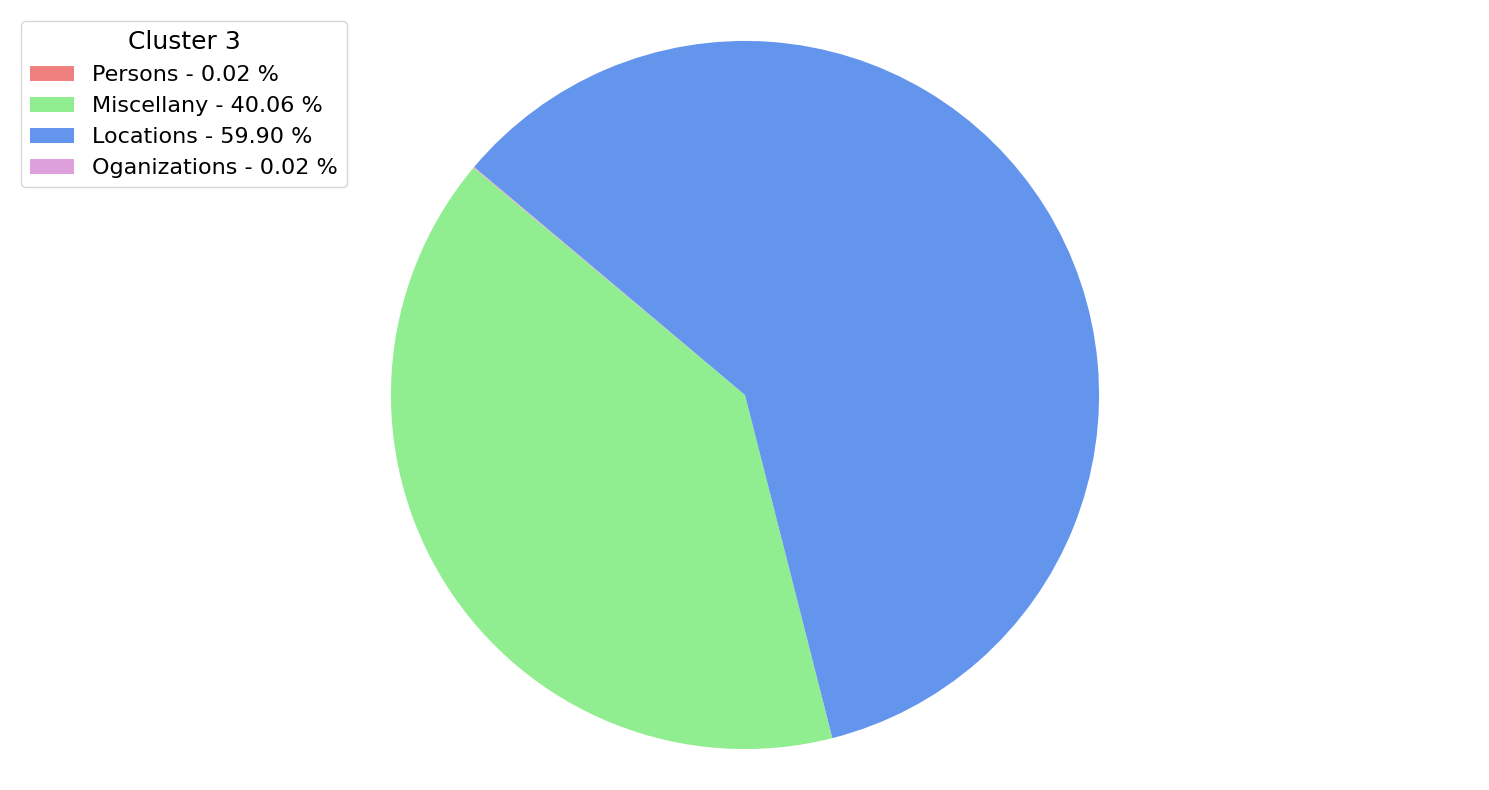

In [14]:
labels = ["Persons", "Miscellany", "Locations", "Oganizations"]#ner_count.keys()
counts = np.array([float(len(per)), float(len(misc)), float(len(loc)), float(len(org))])#ner_count.values()



colors = ['lightcoral', 'lightgreen', 'cornflowerblue', 'plum'] 

#patches, texts = plt.pie(counts, colors=colors, startangle=90, radius=1.2)
porcent = 100.*counts/counts.sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, porcent)]

# Create the pie chart

plt.figure(figsize=(15, 8))
plt.pie(counts, startangle=140, colors=colors, labeldistance=1.10)
plt.title("",fontsize=18)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
legend = plt.legend(labels, title="Cluster 3", loc="upper left",fontsize=16)
legend.get_title().set_fontsize(18)
# Display the pie chart
plt.tight_layout()
plt.show()
